# Benford's law
### Probability(first_digit) = log10(1 + 1/first_digit)

Notes to self/ questions for John:
- any good datasets for fraud detection? Tried digging to find madoff returns or ENRON records but no dice 
- Ran into an issue with the benford formula, although I can get it to drop NaNs easily w/ pandas, I need to ignore/delete the 0s from the list of first digits and do a valuecount for digits 1-9
- possible workarounds: 
    - convert in pandas anyway, get the 0% valuecount, remove from list, scale up all values by 0% num to find the new total proportion
    - get value counts from list induvidully of  1-9, compute num/total(1-9) , log as dataframe
    -  do what I've done currently, which is largely spaghetti
- Are there any other interesting statistical tests I should think about introducing for fun etc? I've stuck with benford b/c it's not difficult to apply regardless of dataset but if I find a good dataset to work with, is there anything else I should look into? 
- What's a goood way of coding to avoid rate limiting? I'm assuming wait etc, importing warnings? Tried mining some data for twitter and it was a nightmare due to rate limiting 
   


Wikipedia definition: 

Benford's law, also called the **Newcomb–Benford law**, the *law of anomalous numbers, or the first-digit law*, is an observation about the frequency distribution of leading digits in many real-life sets of numerical data. The law states that **in many naturally occurring collections of numbers, the leading digit is likely to be small**.[1] In sets that obey the law, **the number 1 appears as the leading significant digit about 30 % of the time, while 9 appears as the leading significant digit less than 5 % of the time. If the digits were distributed uniformly, they would each occur about 11.1 % of the time**.Benford's law also makes predictions about the distribution of second digits, third digits, digit combinations, and so on.
...

It has been shown that this result applies to a wide variety of data sets, including **electricity bills, street addresses, stock prices, house prices, population numbers, death rates, lengths of rivers, and physical and mathematical constants**. Like other general principles about natural data—for example the fact that many data sets are well approximated by a normal distribution—there are illustrative examples and explanations that cover many of the cases where Benford's law applies, though there are many other cases where Benford's law applies that resist a simple explanation. It tends to be **most accurate when values are distributed across multiple orders of magnitude**, especially if the **process generating the numbers is described by a power law (which is common in nature)**.

The law is **named after physicist Frank Benford**, who stated it in 1938 in a paper titled "The Law of Anomalous Numbers", although it had been **previously stated by Simon Newcomb in 1881**.

The law is similar in concept, though not identical in distribution, to **Zipf's law.**

In [1]:
#https://mindingthedata.com/2020/09/09/does-your-data-follow-benfords-law/
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(5,5)})
import numpy as np

In [2]:
#. https://www.learndatasci.com/glossary/benfords-law/

In [3]:
help(np.arange)

Help on built-in function arange in module numpy:

arange(...)
    arange([start,] stop[, step,], dtype=None)
    
    Return evenly spaced values within a given interval.
    
    Values are generated within the half-open interval ``[start, stop)``
    (in other words, the interval including `start` but excluding `stop`).
    For integer arguments the function is equivalent to the Python built-in
    `range` function, but returns an ndarray rather than a list.
    
    When using a non-integer step, such as 0.1, the results will often not
    be consistent.  It is better to use `numpy.linspace` for these cases.
    
    Parameters
    ----------
    start : number, optional
        Start of interval.  The interval includes this value.  The default
        start value is 0.
    stop : number
        End of interval.  The interval does not include this value, except
        in some cases where `step` is not an integer and floating point
        round-off affects the length of `out`.
   

## Using numpy to define benford's law

In [4]:
x = np.array(np.arange(1, 10))
y=np.log10(1 + 1/x)

print(x)
print(y)


[1 2 3 4 5 6 7 8 9]
[0.30103    0.17609126 0.12493874 0.09691001 0.07918125 0.06694679
 0.05799195 0.05115252 0.04575749]


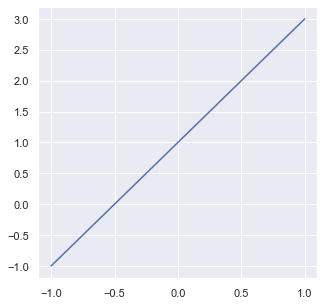

In [5]:
#Example of a line chart:
t = np.linspace(-1, 1, 50)
# print(t)
s = 2*t + 1

plt.plot(t, s)
plt.show()

# Making a Benford's law chart:

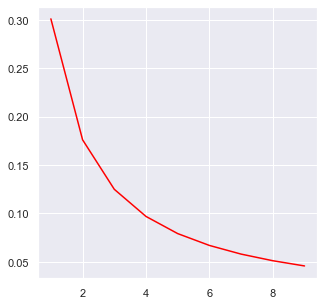

In [6]:
# sns.palplot(sns.color_palette("husl", 8))
plt.plot(x, y, color='red')

plt.show()

In [7]:
# well, we'll probably want to combine two charts, right?

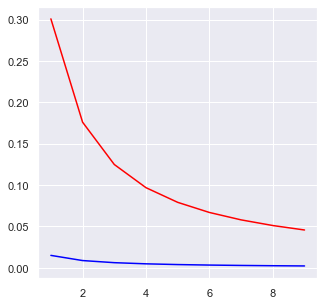

In [8]:
w=y*.05
# plt.figure(num = 3, figsize=(8, 5))
plt.plot(x, w, color='blue')
plt.plot(x, y, color='red')

plt.show()

# Reading some data:

In [9]:
cities= pd.read_csv("https://raw.githubusercontent.com/eduardixon/benfords_law/master/worldcities.csv")

In [10]:
cities.head()

city   city_ascii      lat       lng        country iso2 iso3  \
0        Tokyo        Tokyo  35.6850  139.7514          Japan   JP  JPN   
1     New York     New York  40.6943  -73.9249  United States   US  USA   
2  Mexico City  Mexico City  19.4424  -99.1310         Mexico   MX  MEX   
3       Mumbai       Mumbai  19.0170   72.8570          India   IN  IND   
4    São Paulo    Sao Paulo -23.5587  -46.6250         Brazil   BR  BRA   

         admin_name  capital  population          id  
0             Tōkyō  primary  35676000.0  1392685764  
1          New York      NaN  19354922.0  1840034016  
2  Ciudad de México  primary  19028000.0  1484247881  
3       Mahārāshtra    admin  18978000.0  1356226629  
4         São Paulo    admin  18845000.0  1076532519

In [11]:
# get leading digits in column:
# help(cities["population"].astype(str))
print(cities["population"].dropna().astype(str).str[0])


0        3
1        1
2        1
3        1
4        1
        ..
15488    1
15489    0
15490    0
15491    0
15492    0
Name: population, Length: 13808, dtype: object


In [12]:
#convert to numpy array
city_pop=np.array(cities["population"])

In [13]:
city_pop = city_pop[np.logical_not(np.isnan(city_pop))]

In [14]:
print(x,y)

[1 2 3 4 5 6 7 8 9] [0.30103    0.17609126 0.12493874 0.09691001 0.07918125 0.06694679
 0.05799195 0.05115252 0.04575749]


# Loading it as a dataframe,  just in case:

In [15]:
help(pd.DataFrame)

Help on class DataFrame in module pandas.core.frame:

class DataFrame(pandas.core.generic.NDFrame)
 |  DataFrame(data=None, index: Union[Collection, NoneType] = None, columns: Union[Collection, NoneType] = None, dtype: Union[str, numpy.dtype, ForwardRef('ExtensionDtype'), NoneType] = None, copy: bool = False)
 |  
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |  
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects.
 |  
 |      .. versionchanged:: 0.23.0
 |         If data is a dict, column order follows insertion-order for
 |         Python 3.6 and later.
 |  
 |      .. versionchanged:: 0.25.0

In [16]:
leading_digits = cities["population"].dropna().astype(str).str[0]

In [17]:
cities.tail()

city   city_ascii      lat       lng    country iso2 iso3  \
15488  Timmiarmiut  Timmiarmiut  62.5333  -42.2167  Greenland   GL  GRL   
15489  Cheremoshna  Cheremoshna  51.3894   30.0989    Ukraine   UA  UKR   
15490    Ambarchik    Ambarchik  69.6510  162.3336     Russia   RU  RUS   
15491      Nordvik      Nordvik  74.0165  111.5100     Russia   RU  RUS   
15492      Ennadai      Ennadai  61.1333 -100.8833     Canada   CA  CAN   

               admin_name capital  population          id  
15488            Kujalleq     NaN        10.0  1304206491  
15489   Kyyivs’ka Oblast’     NaN         0.0  1804043438  
15490    Sakha (Yakutiya)     NaN         0.0  1643739159  
15491  Krasnoyarskiy Kray     NaN         0.0  1643587468  
15492             Nunavut     NaN         0.0  1124019423

In [18]:
type(leading_digits)

pandas.core.series.Series

In [19]:
#drop zeros

In [20]:
leading_digits = leading_digits.where( leading_digits != "0").dropna()

In [21]:
leading_digits

0        3
1        1
2        1
3        1
4        1
        ..
15484    1
15485    1
15486    1
15487    1
15488    1
Name: population, Length: 13802, dtype: object

In [22]:
digit_counts = leading_digits.value_counts(normalize=True)

In [23]:
digit_counts

1    0.309883
2    0.152949
5    0.106579
3    0.092305
6    0.085277
7    0.072019
8    0.064194
4    0.063034
9    0.053760
Name: population, dtype: float64

In [24]:
help(digit_counts)

Help on Series in module pandas.core.series object:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)
 |  
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, *, **) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, Iterable, dict, or scalar value
 |      Contains data stored in Series.
 |  
 |      .. versionchanged::

In [25]:
digit_counts[0]

0.30988262570641933

In [26]:
x

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [27]:
digit_counts.index=[int(z) for z in digit_counts.index ]

In [28]:
digit_counts.index

Int64Index([1, 2, 5, 3, 6, 7, 8, 4, 9], dtype='int64')

In [29]:
help(digit_counts.sort_index())

Help on Series in module pandas.core.series object:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)
 |  
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, *, **) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, Iterable, dict, or scalar value
 |      Contains data stored in Series.
 |  
 |      .. versionchanged::

In [30]:
digit_counts= digit_counts.sort_index()

In [31]:
digit_counts

1    0.309883
2    0.152949
3    0.092305
4    0.063034
5    0.106579
6    0.085277
7    0.072019
8    0.064194
9    0.053760
Name: population, dtype: float64

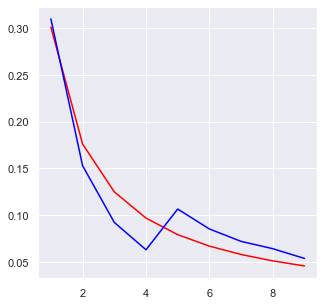

In [32]:
plt.plot(x, y , color='red')

plt.plot(digit_counts.index, digit_counts.values, color='blue')

plt.show()

# try it again with a function

In [33]:
# # try it again with a function



def Benford_graph(data_index_name, csv_url):
    # x and y are numpy arrays of benfordness
    x = np.array(np.arange(1, 10))
    y=np.log10(1 + 1/x)
    # x and y are numpy arrays
    data_frame= pd.read_csv(str(csv_url))
    leading_digits = data_frame[str(data_index_name)].dropna().astype(str).str[0]
    leading_digits = leading_digits.where( leading_digits != "0").dropna()
    digit_counts = leading_digits.value_counts(normalize=True)
    digit_counts.index=[int(z) for z in digit_counts.index ]
    digit_counts= digit_counts.sort_index()
    plt.ylabel('Frequency (%)')
    plt.xlabel('Leading digit')
    plt.plot(x, y , color='red')

    plt.plot(digit_counts.index, digit_counts.values, color='blue')

    plt.show()
    
    
    

In [34]:
def Benford_graph_replace(data_index_name, csv_url, replace_str):
    # x and y are numpy arrays of benfordness
    x = np.array(np.arange(1, 10))
    y=np.log10(1 + 1/x)
    # x and y are numpy arrays
    data_frame= pd.read_csv(str(csv_url))
    # if df= NaN replace with 1
    data_frame= data_frame[str(data_index_name)].fillna(replace_str)
    data_frame=data_frame.replace("0", "1")
    leading_digits = data_frame.astype(str).str[0]
    leading_digits = leading_digits.where( leading_digits != "0").dropna()
    digit_counts = leading_digits.value_counts(normalize=True)
#     return data_frame.head()
    digit_counts.index=[int(z) for z in digit_counts.index ]
    digit_counts= digit_counts.sort_index()
    plt.ylabel('Frequency (%)')
    plt.xlabel('Leading digit')
    plt.plot(x, y , color='red')

    plt.plot(digit_counts.index, digit_counts.values, color='blue')

    plt.show()

# Covid cases in Belgium

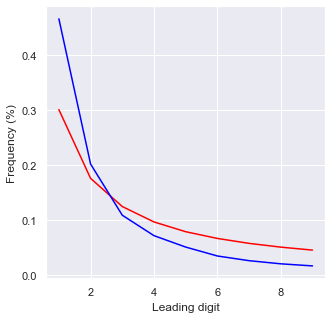

In [35]:
Benford_graph("CASES", "https://raw.githubusercontent.com/4dcu-be/BenfordsLaw/master/data/COVID19BE_CASES_AGESEX.csv")

Notes on data gaps:
    - Here is the network graph of some data scraped from twitter, showing the activity of the dogecoin_2 in graph:

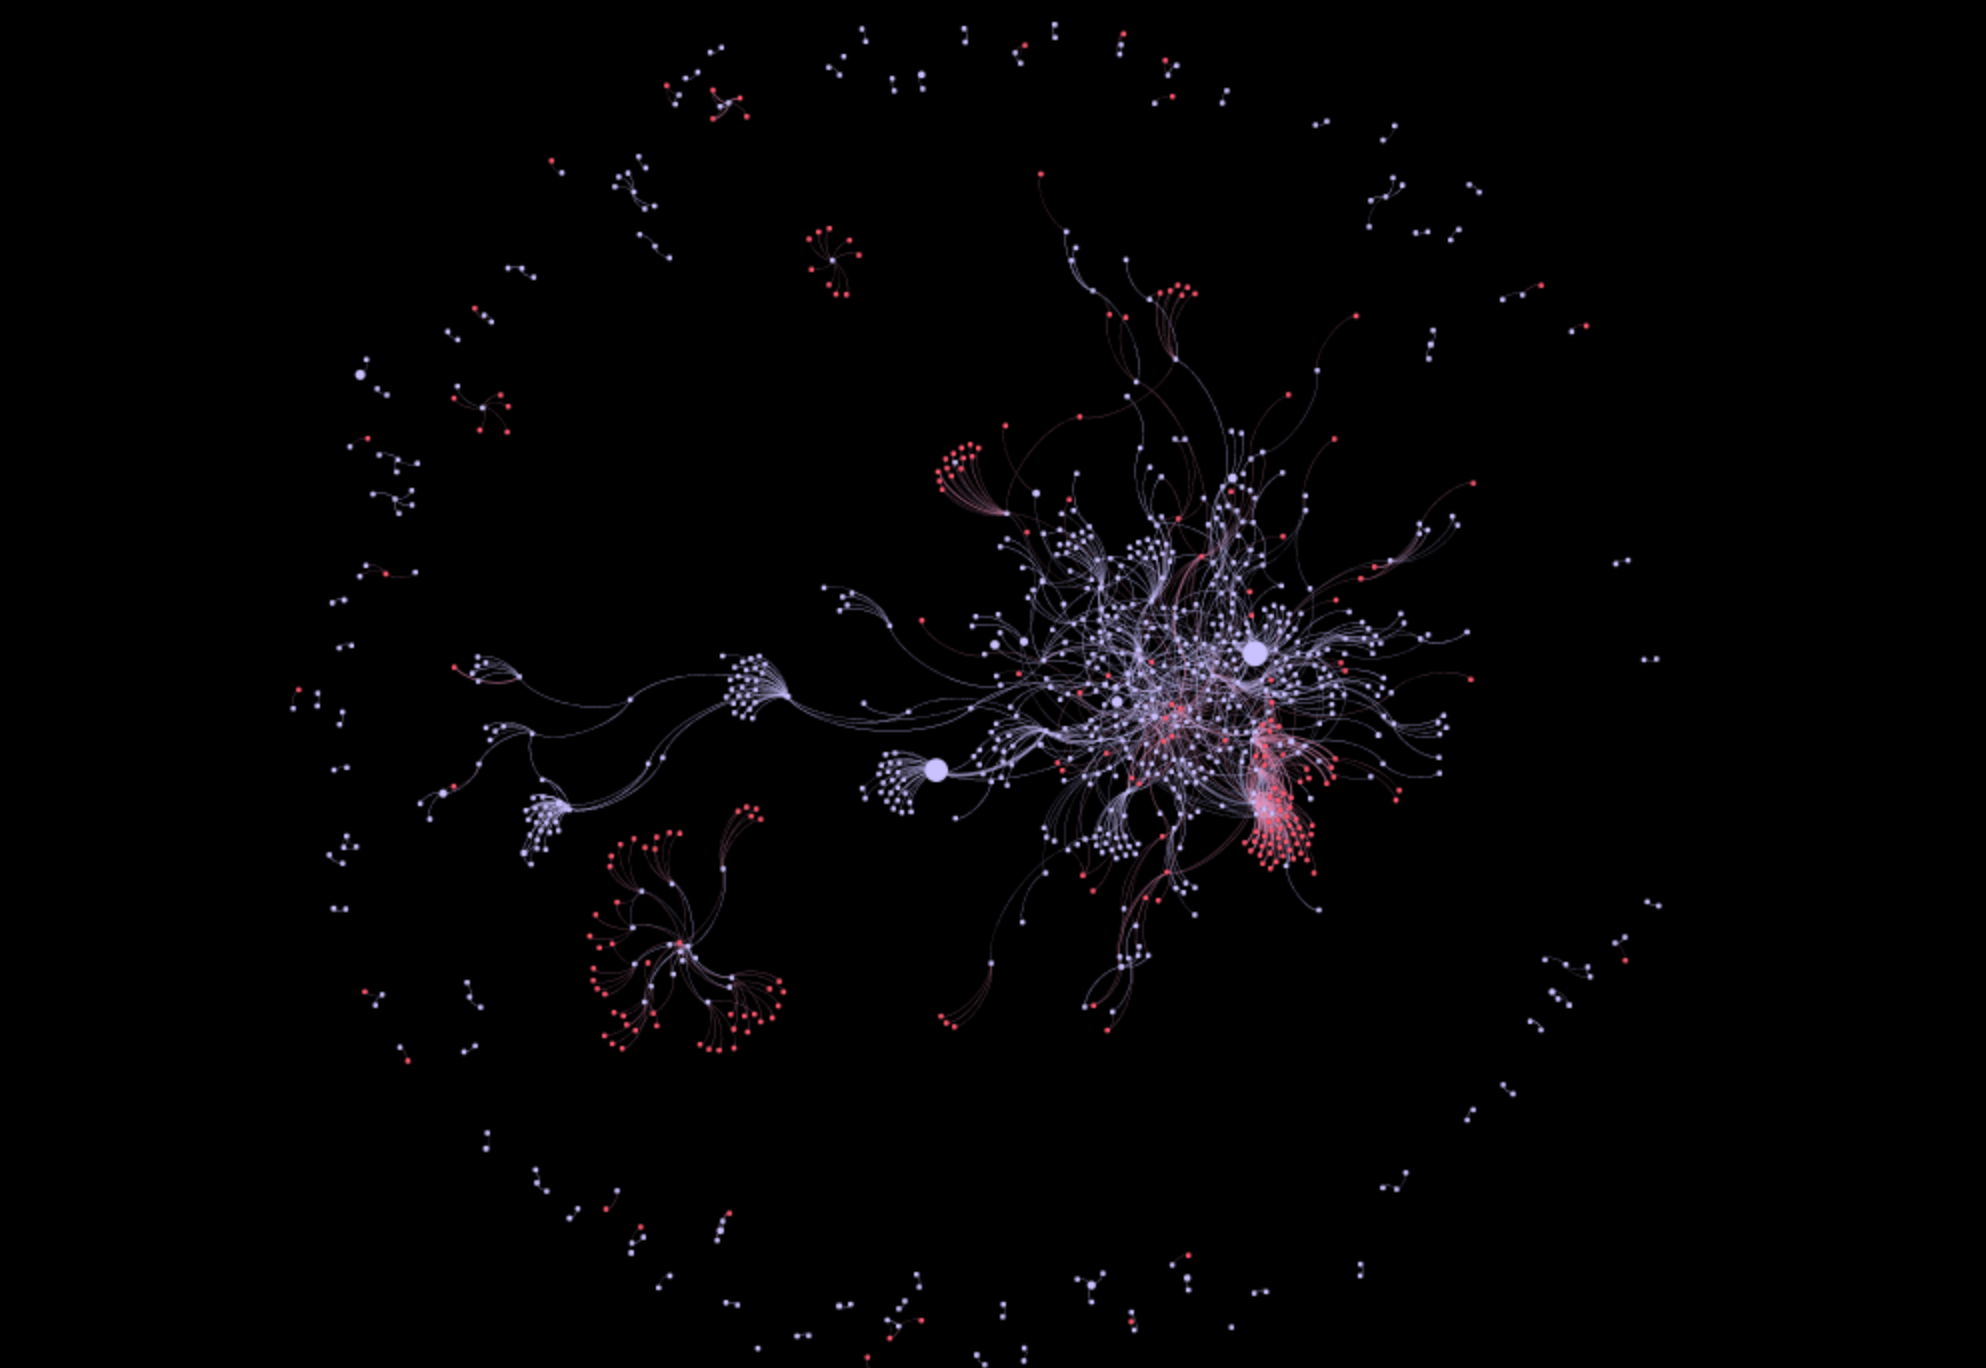

In [125]:
from IPython.display import Image
Image(filename='dogecoin_2.png') 

The red points hide thier friend and follower counts, but make up a lot of the suspected bot accounts. As a result, the data adheres to benford's law more than expected:

# Dogecoin graph 1

In [36]:
sarahs_dogecoin_botnet= pd.read_csv("dogecoin_1.csv")

In [37]:
sarahs_dogecoin_botnet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       623 non-null    object 
 1   Label                    623 non-null    object 
 2   timeset                  597 non-null    object 
 3   twitter_type             623 non-null    object 
 4   lat                      0 non-null      float64
 5   lng                      0 non-null      float64
 6   place_country            0 non-null      float64
 7   place_type               0 non-null      float64
 8   place_fullname           0 non-null      float64
 9   place_name               0 non-null      float64
 10  created_at               536 non-null    object 
 11  lang                     0 non-null      float64
 12  possibly_sensitive       0 non-null      float64
 13  quoted_status_permalink  0 non-null      float64
 14  description              4

In [38]:
sarahs_dogecoin_botnet.head()

Id             Label  \
0   @aldrich_armand   @aldrich_armand   
1          @binance          @binance   
2    @autumn_kondor    @autumn_kondor   
3  @davidgokhshtein  @davidgokhshtein   
4         @nngtruby         @nngtruby   

                                             timeset twitter_type  lat  lng  \
0                       <[2021-05-04T04:18:44.636Z]>         User  NaN  NaN   
1  <[2021-05-04T04:18:44.636Z, 2021-05-04T04:19:0...         User  NaN  NaN   
2  <[2021-05-04T04:18:47.488Z, 2021-05-04T04:19:0...         User  NaN  NaN   
3  <[2021-05-04T04:18:47.488Z, 2021-05-04T04:19:0...         User  NaN  NaN   
4                       <[2021-05-04T04:18:48.921Z]>         User  NaN  NaN   

   place_country  place_type  place_fullname  place_name  ... email  \
0            NaN         NaN             NaN         NaN  ...   NaN   
1            NaN         NaN             NaN         NaN  ...   NaN   
2            NaN         NaN             NaN         NaN  ...   NaN   
3            NaN         NaN             NaN         NaN  ...   NaN   
4            NaN         NaN             NaN         NaN  ...   NaN   

                                       profile_image  friends_count  \
0  http://pbs.twimg.com/profile_images/1388561603...         3924.0   
1  http://pbs.twimg.com/profile_images/1377608897...          417.0   
2  http://pbs.twimg.com/profile_images/1384649348...          198.0   
3  http://pbs.twimg.com/profile_images/1380903509...         1281.0   
4  http://pbs.twimg.com/profile_images/1389071895...            1.0   

   followers_count         real_name         location emoji_alias  \
0          10212.0       Aquarius ♒️  New Jersey, USA         NaN   
1        3160058.0           Binance              NaN         NaN   
2             20.0     Autumn Kondor              NaN         NaN   
3         303949.0  David Gokhshtein     New York, NY         NaN   
4              3.0         Ruby NNGT              NaN         NaN   

   emoji_html_decimal  emoji_utf8 modularity_class  
0                 NaN         NaN                0  
1                 NaN         NaN                0  
2                 NaN         NaN                1  
3                 NaN         NaN                1  
4                 NaN         NaN                5  

[5 rows x 25 columns]

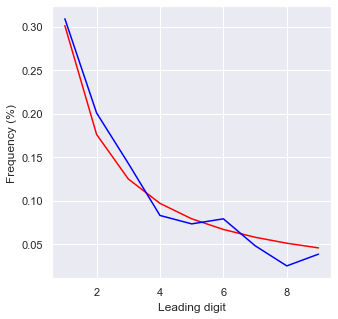

In [39]:
Benford_graph("followers_count", "dogecoin_1.csv")

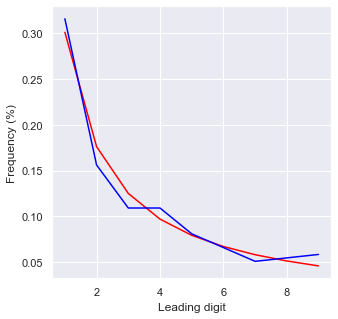

In [40]:
Benford_graph("friends_count", "dogecoin_1.csv")

# Dogecoin Graph 2

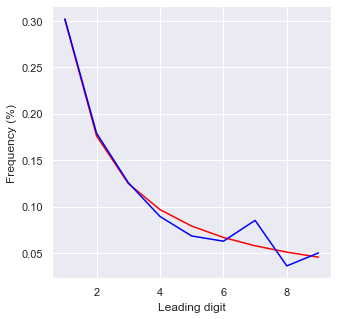

In [43]:
Benford_graph("followers_count", "dogecoin_2.csv")

When we replace the missing data, we start to see how much is missing:

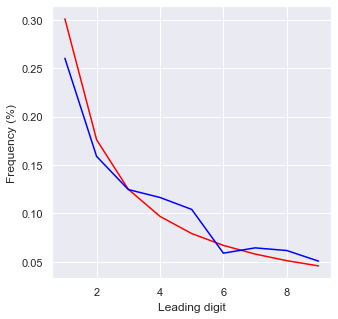

In [44]:
Benford_graph("friends_count", "dogecoin_2.csv")

# what if I replace the nans with a number?

## dogecoin 1 :

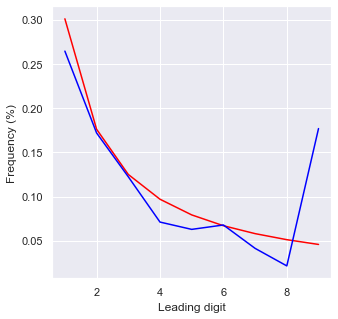

In [42]:
Benford_graph_replace("followers_count", "dogecoin_1.csv", "9")

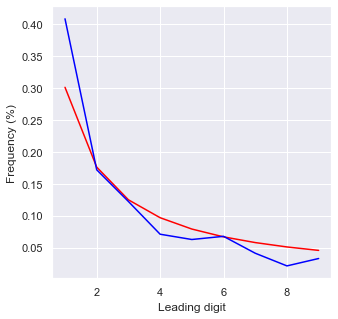

In [41]:
Benford_graph_replace("followers_count", "dogecoin_1.csv", "1")

## dogecoin 2 :

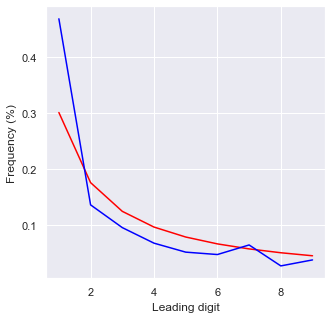

In [45]:
Benford_graph_replace("followers_count", "dogecoin_2.csv", "1")

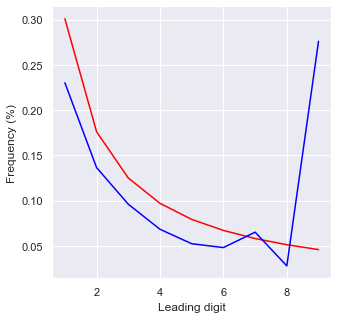

In [46]:
Benford_graph_replace("followers_count", "dogecoin_2.csv", "9")

In [47]:
## Working with Alabama Covid dataset

In [48]:
covid_al= pd.read_excel("COVID-19 in Alabama.xlsx")

In [49]:
covid_al.head()

County of Residence Total Cases Total Deaths  7-Day % Change in Cases  \
0             AUTAUGA        7745          114                      4.8   
1             BALDWIN       27098          330                     -6.2   
2             BARBOUR        2610           63                      4.8   
3                BIBB        2990           66                    -21.1   
4              BLOUNT        7567          140                      7.5   

   7-Day % Positivity in Tests  7-Day Case Rate  
0                         26.5            275.6  
1                         33.3            669.7  
2                         35.4            352.4  
3                         22.4            317.0  
4                         27.7            297.4

In [50]:
covid_al=covid_al["Total Cases"]
covid_al

0                                                  7745
1                                                 27098
2                                                  2610
3                                                  2990
4                                                  7567
                            ...                        
63                                                 8008
64                                                 1959
65                                                 1337
66                                                 3081
67    <span class="footersize">Cases: <br>607209</span>
Name: Total Cases, Length: 68, dtype: object

In [51]:
covid_al=covid_al.astype(str).str[0]
covid_al

0     7
1     2
2     2
3     2
4     7
     ..
63    8
64    1
65    1
66    3
67    <
Name: Total Cases, Length: 68, dtype: object

In [52]:
covid_al=covid_al.where( covid_al != "0").dropna().value_counts(normalize=True)
covid_al

1    0.367647
2    0.220588
3    0.117647
4    0.102941
6    0.058824
7    0.044118
9    0.029412
8    0.029412
<    0.014706
5    0.014706
Name: Total Cases, dtype: float64

In [53]:
covid_al.index

Index(['1', '2', '3', '4', '6', '7', '9', '8', '<', '5'], dtype='object')

In [54]:
covid_al.index.str.isdigit()

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True])

In [55]:
covid_al=covid_al.where( covid_al.index.str.isdigit() == True).dropna()
covid_al

1    0.367647
2    0.220588
3    0.117647
4    0.102941
6    0.058824
7    0.044118
9    0.029412
8    0.029412
5    0.014706
Name: Total Cases, dtype: float64

In [56]:
covid_al=covid_al.sort_index()
covid_al

1    0.367647
2    0.220588
3    0.117647
4    0.102941
5    0.014706
6    0.058824
7    0.044118
8    0.029412
9    0.029412
Name: Total Cases, dtype: float64

In [57]:

covid_al

1    0.367647
2    0.220588
3    0.117647
4    0.102941
5    0.014706
6    0.058824
7    0.044118
8    0.029412
9    0.029412
Name: Total Cases, dtype: float64

In [58]:
covid_al=covid_al.astype("float")

this fixes the graph, no one knows why

In [59]:
covid_al.index=covid_al.index.astype(int)

In [60]:
type(covid_al.index[0])

numpy.int64

In [61]:
type(covid_al.values[0])

numpy.float64

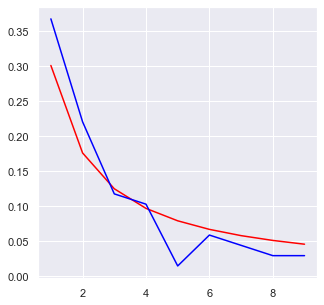

In [62]:
plt.plot(x, y , color='red')

plt.plot(covid_al.index, covid_al.values, color='blue')

plt.show()

In [63]:
help(np.arange)

Help on built-in function arange in module numpy:

arange(...)
    arange([start,] stop[, step,], dtype=None)
    
    Return evenly spaced values within a given interval.
    
    Values are generated within the half-open interval ``[start, stop)``
    (in other words, the interval including `start` but excluding `stop`).
    For integer arguments the function is equivalent to the Python built-in
    `range` function, but returns an ndarray rather than a list.
    
    When using a non-integer step, such as 0.1, the results will often not
    be consistent.  It is better to use `numpy.linspace` for these cases.
    
    Parameters
    ----------
    start : number, optional
        Start of interval.  The interval includes this value.  The default
        start value is 0.
    stop : number
        End of interval.  The interval does not include this value, except
        in some cases where `step` is not an integer and floating point
        round-off affects the length of `out`.
   

# Second Digit Rule:

special thanks: https://s3.amazonaws.com/assets.datacamp.com/production/course_8916/slides/chapter4.pdf

In [64]:
x2=np.arange(1,100,1)
y2=np.log10(1 + 1/x2)

In [65]:
x2

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [68]:
y2

array([0.30103   , 0.17609126, 0.12493874, 0.09691001, 0.07918125,
       0.06694679, 0.05799195, 0.05115252, 0.04575749, 0.04139269,
       0.03778856, 0.03476211, 0.03218468, 0.02996322, 0.02802872,
       0.02632894, 0.02482358, 0.0234811 , 0.02227639, 0.0211893 ,
       0.02020339, 0.01930516, 0.01848341, 0.01772877, 0.01703334,
       0.01639042, 0.01579427, 0.01523997, 0.01472326, 0.01424044,
       0.01378828, 0.01336396, 0.01296498, 0.01258913, 0.01223446,
       0.01189922, 0.01158187, 0.01128101, 0.01099538, 0.01072387,
       0.01046543, 0.01021917, 0.00998422, 0.00975984, 0.00954532,
       0.00934003, 0.00914338, 0.00895484, 0.00877392, 0.00860017,
       0.00843317, 0.00827253, 0.00811789, 0.00796893, 0.00782534,
       0.00768683, 0.00755314, 0.00742402, 0.00729924, 0.00717858,
       0.00706185, 0.00694886, 0.00683942, 0.00673338, 0.00663058,
       0.00653087, 0.00643411, 0.00634018, 0.00624895, 0.00616031,
       0.00607415, 0.00599036, 0.00590886, 0.00582954, 0.00575

In [66]:
np.log10(1 + 1/12)
# yes this passes the test, it's the right

0.03476210625921191

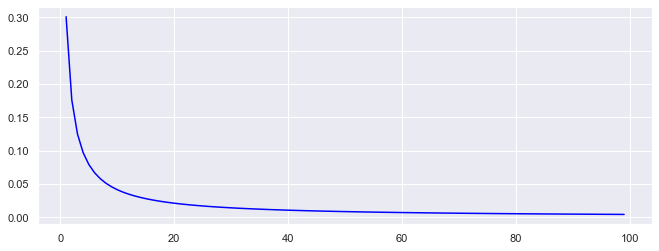

In [69]:
plt.figure(figsize=(11, 4))
plt.plot(x2, y2, color='blue')

plt.show()

In [70]:
cities_2=cities["population"].dropna().astype(str).str[:2]

In [71]:
cities_2=cities_2.where( cities_2 != "0.").dropna()

In [72]:
cities_2=cities_2.apply(lambda v: int(v) )

In [73]:
cities_2 = cities_2.value_counts(normalize=True)

In [74]:
cities_2=cities_2.sort_index()

In [75]:
cities_2

10    0.050862
11    0.042458
12    0.034560
13    0.031010
14    0.030358
        ...   
95    0.004854
96    0.005651
97    0.004927
98    0.005217
99    0.004057
Name: population, Length: 90, dtype: float64

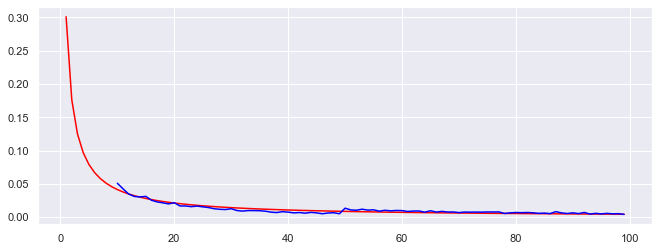

In [76]:
    plt.figure(figsize=(11, 4))
    plt.plot(x2, y2 , color='red')

    plt.plot(cities_2.index, cities_2.values, color='blue')

    plt.show()

In [77]:
def Benford_graph_second_rule(data_index_name, csv_url):
    # x and y are numpy arrays of benfordness
    x2=np.arange(1,100,1)
    y=np.log10(1 + 1/x2)
    # x and y are numpy arrays
    try:
        cities_2= pd.read_csv(str(csv_url))
    except:
            cities_2= pd.read_excel(str(csv_url))
    
    cities_2=cities_2[str(data_index_name)].dropna().astype(str).str[:2]
    cities_2=cities_2.where( cities_2 != "0.").dropna()
    cities_2=cities_2.astype(float)
#     cities_2=cities_2.astype(int)
#     cities_2.info()
#     cities_2=cities_2.apply(lambda v: int(v))
    cities_2 = cities_2.value_counts(normalize=True)
#     cities_2.index=[int(z) for z in digit_counts.index ]
    cities_2=cities_2.sort_index()
#     leading_digits = leading_digits.where( leading_digits != "0").dropna()
#     digit_counts = leading_digits.value_counts(normalize=True)

    plt.figure(figsize=(11, 4))
    plt.ylabel('Frequency (%)')
    plt.xlabel('Leading digit')
    plt.plot(x2, y2 , color='red')

    plt.plot(cities_2.index, cities_2.values, color='blue')

    plt.show()
    print(cities_2)

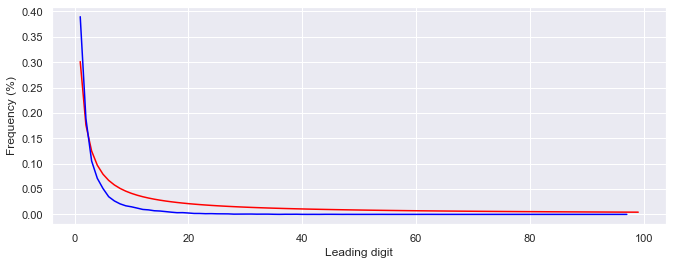

1.0     0.389522
2.0     0.188589
3.0     0.105270
4.0     0.071063
5.0     0.050952
          ...   
83.0    0.000045
89.0    0.000045
91.0    0.000045
93.0    0.000045
97.0    0.000045
Name: CASES, Length: 65, dtype: float64


In [78]:
 Benford_graph_second_rule("CASES", "https://raw.githubusercontent.com/4dcu-be/BenfordsLaw/master/data/COVID19BE_CASES_AGESEX.csv")

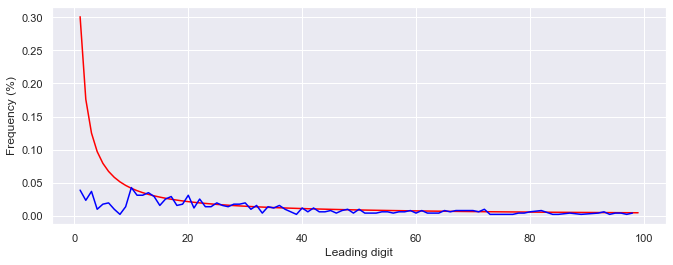

1.0     0.038610
2.0     0.023166
3.0     0.036680
4.0     0.009653
5.0     0.017375
          ...   
94.0    0.001931
95.0    0.003861
96.0    0.003861
97.0    0.001931
98.0    0.003861
Name: followers_count, Length: 91, dtype: float64


In [79]:
 Benford_graph_second_rule("followers_count", "dogecoin_1.csv")

## seaborn planet dataset

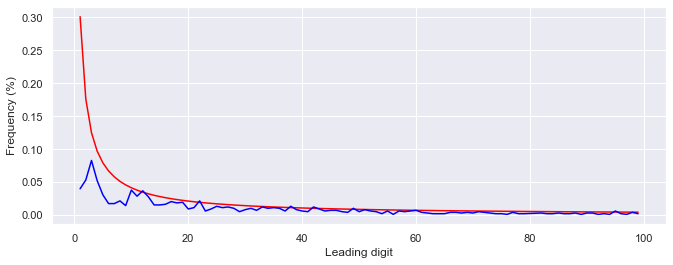

1.0     0.039877
2.0     0.053170
3.0     0.082822
4.0     0.052147
5.0     0.030675
          ...   
95.0    0.006135
96.0    0.002045
97.0    0.001022
98.0    0.004090
99.0    0.002045
Name: orbital_period, Length: 96, dtype: float64


In [80]:
 Benford_graph_second_rule("orbital_period", "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/planets.csv")

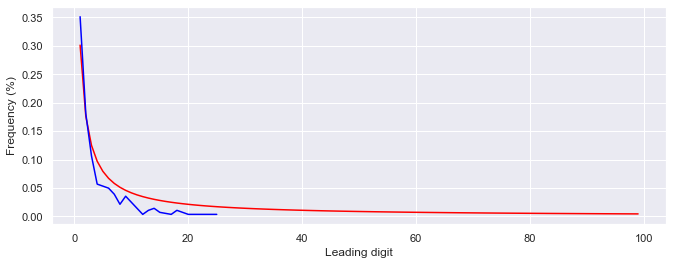

1.0     0.351064
2.0     0.180851
3.0     0.106383
4.0     0.056738
5.0     0.053191
6.0     0.049645
7.0     0.039007
8.0     0.021277
9.0     0.035461
10.0    0.024823
11.0    0.014184
12.0    0.003546
13.0    0.010638
14.0    0.014184
15.0    0.007092
17.0    0.003546
18.0    0.010638
19.0    0.007092
20.0    0.003546
21.0    0.003546
25.0    0.003546
Name: mass, dtype: float64


In [81]:
 Benford_graph_second_rule("mass", "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/planets.csv")

In [82]:
sarahs_dogecoin_botnet.head()

Id             Label  \
0   @aldrich_armand   @aldrich_armand   
1          @binance          @binance   
2    @autumn_kondor    @autumn_kondor   
3  @davidgokhshtein  @davidgokhshtein   
4         @nngtruby         @nngtruby   

                                             timeset twitter_type  lat  lng  \
0                       <[2021-05-04T04:18:44.636Z]>         User  NaN  NaN   
1  <[2021-05-04T04:18:44.636Z, 2021-05-04T04:19:0...         User  NaN  NaN   
2  <[2021-05-04T04:18:47.488Z, 2021-05-04T04:19:0...         User  NaN  NaN   
3  <[2021-05-04T04:18:47.488Z, 2021-05-04T04:19:0...         User  NaN  NaN   
4                       <[2021-05-04T04:18:48.921Z]>         User  NaN  NaN   

   place_country  place_type  place_fullname  place_name  ... email  \
0            NaN         NaN             NaN         NaN  ...   NaN   
1            NaN         NaN             NaN         NaN  ...   NaN   
2            NaN         NaN             NaN         NaN  ...   NaN   
3            NaN         NaN             NaN         NaN  ...   NaN   
4            NaN         NaN             NaN         NaN  ...   NaN   

                                       profile_image  friends_count  \
0  http://pbs.twimg.com/profile_images/1388561603...         3924.0   
1  http://pbs.twimg.com/profile_images/1377608897...          417.0   
2  http://pbs.twimg.com/profile_images/1384649348...          198.0   
3  http://pbs.twimg.com/profile_images/1380903509...         1281.0   
4  http://pbs.twimg.com/profile_images/1389071895...            1.0   

   followers_count         real_name         location emoji_alias  \
0          10212.0       Aquarius ♒️  New Jersey, USA         NaN   
1        3160058.0           Binance              NaN         NaN   
2             20.0     Autumn Kondor              NaN         NaN   
3         303949.0  David Gokhshtein     New York, NY         NaN   
4              3.0         Ruby NNGT              NaN         NaN   

   emoji_html_decimal  emoji_utf8 modularity_class  
0                 NaN         NaN                0  
1                 NaN         NaN                0  
2                 NaN         NaN                1  
3                 NaN         NaN                1  
4                 NaN         NaN                5  

[5 rows x 25 columns]

# third digit rule:

In [84]:
x3=np.arange(1,1000,1)
y3=np.log10(1 + 1/x3)

In [85]:
x3

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [86]:
np.log10(1 + 1/12)
# yes this passes the test, it's the right

0.03476210625921191

In [88]:
y3

array([0.30103   , 0.17609126, 0.12493874, 0.09691001, 0.07918125,
       0.06694679, 0.05799195, 0.05115252, 0.04575749, 0.04139269,
       0.03778856, 0.03476211, 0.03218468, 0.02996322, 0.02802872,
       0.02632894, 0.02482358, 0.0234811 , 0.02227639, 0.0211893 ,
       0.02020339, 0.01930516, 0.01848341, 0.01772877, 0.01703334,
       0.01639042, 0.01579427, 0.01523997, 0.01472326, 0.01424044,
       0.01378828, 0.01336396, 0.01296498, 0.01258913, 0.01223446,
       0.01189922, 0.01158187, 0.01128101, 0.01099538, 0.01072387,
       0.01046543, 0.01021917, 0.00998422, 0.00975984, 0.00954532,
       0.00934003, 0.00914338, 0.00895484, 0.00877392, 0.00860017,
       0.00843317, 0.00827253, 0.00811789, 0.00796893, 0.00782534,
       0.00768683, 0.00755314, 0.00742402, 0.00729924, 0.00717858,
       0.00706185, 0.00694886, 0.00683942, 0.00673338, 0.00663058,
       0.00653087, 0.00643411, 0.00634018, 0.00624895, 0.00616031,
       0.00607415, 0.00599036, 0.00590886, 0.00582954, 0.00575

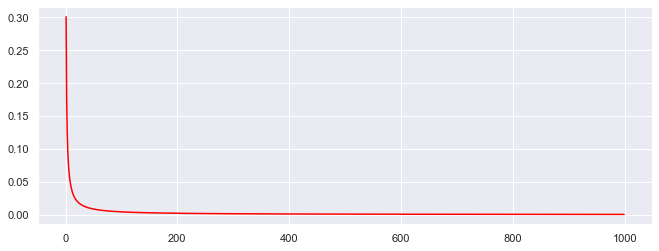

In [89]:
plt.figure(figsize=(11, 4))
plt.plot(x3, y3, color='red')

plt.show()

In [90]:
def Benford_graph_third_rule(data_index_name, csv_url):
    # x and y are numpy arrays of benfordness
    x3=np.arange(1,1000,1)
    y3=np.log10(1 + 1/x3)
    # x and y are numpy arrays
    cities_2= pd.read_csv(str(csv_url))
    cities_2=cities_2[str(data_index_name)].dropna().astype(str).str[:3]
    cities_2=cities_2.where( cities_2 != "0.").dropna()
    cities_2=cities_2.astype(float)
    cities_2=cities_2.astype(int)
#     cities_2=cities_2.apply(lambda v: int(v))
    cities_2 = cities_2.value_counts(normalize=True)
    cities_2.index = cities_2.index.astype(int)
#     cities_2.values = cities_2.values.astype(float)
    cities_2=cities_2.sort_index()
#     leading_digits = leading_digits.where( leading_digits != "0").dropna()
#     digit_counts = leading_digits.value_counts(normalize=True)
#     digit_counts.index=[int(z) for z in digit_counts.index ]
#     digit_counts= digit_counts.sort_index()

    plt.figure(figsize=(15, 5))
    plt.ylabel('Frequency (%)')
    plt.xlabel('Leading digit')
    plt.plot(x3, y3 , color='red')

    plt.plot(cities_2.index, cities_2.values, color='blue')

    plt.show()

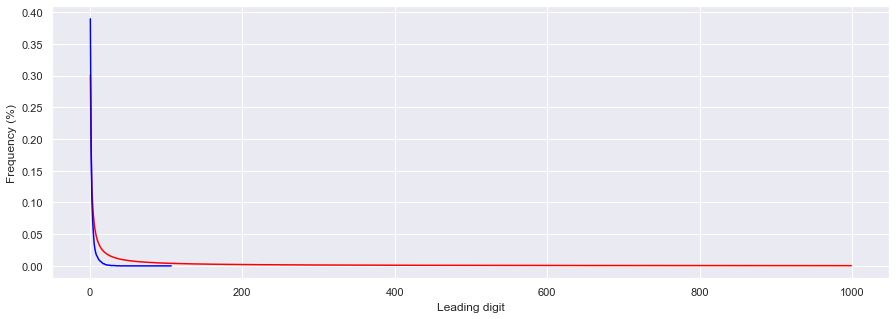

In [91]:
 Benford_graph_third_rule("CASES", "https://raw.githubusercontent.com/4dcu-be/BenfordsLaw/master/data/COVID19BE_CASES_AGESEX.csv")

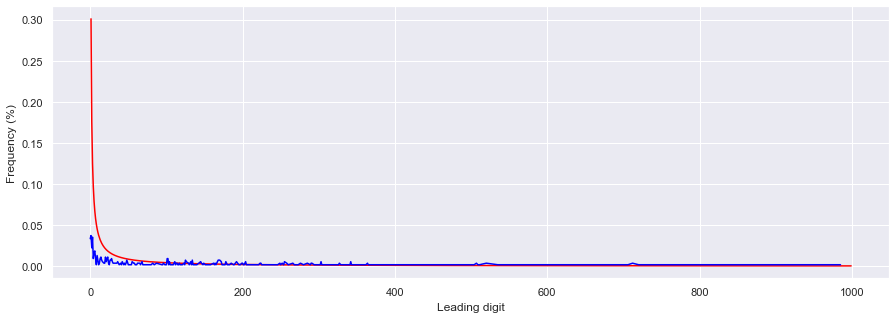

In [92]:
Benford_graph_third_rule("followers_count", "dogecoin_1.csv")

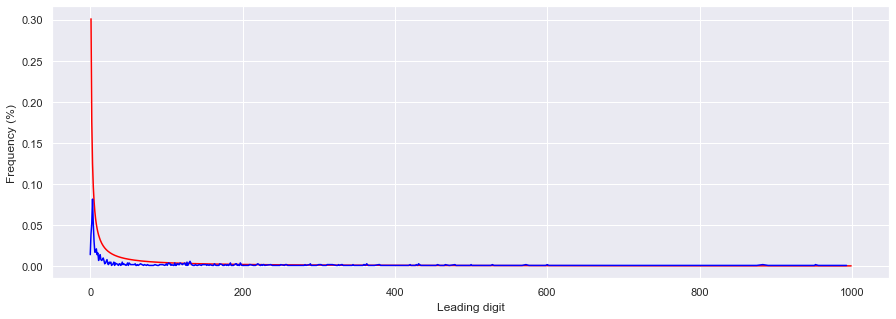

In [93]:
 Benford_graph_third_rule("orbital_period", "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/planets.csv")

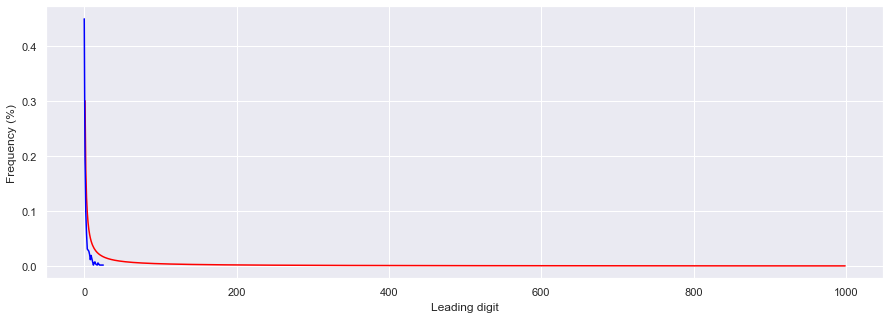

In [94]:
 Benford_graph_third_rule("mass", "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/planets.csv")

# working with botometer data: 

data: https://botometer.osome.iu.edu/bot-repository/datasets.html

## parse the data to dataframe:

In [95]:
df=pd.read_json("vendor-purchased-2019_tweets.json")

In [96]:
import json
# some JSON:
# x = '{ "name":"John", "age":30, "city":"New York"}'

# parse x:
# y = json.dumps(x)
# y = json.loads(y)

# # the result is a Python dictionary:
# print(type(y))

In [97]:
df.head()
#produced a nested json. oops

created_at                                               user
0 2018-01-09 16:38:26+00:00  {'follow_request_sent': False, 'has_extended_p...
1 2018-01-12 21:55:46+00:00  {'follow_request_sent': False, 'has_extended_p...
2 2018-01-13 20:16:44+00:00  {'follow_request_sent': False, 'has_extended_p...
3 2018-01-11 06:31:06+00:00  {'follow_request_sent': False, 'has_extended_p...
4 2018-01-09 02:16:16+00:00  {'follow_request_sent': False, 'has_extended_p...

In [98]:
# parsing the nested json:
dict_list=[]
for i in range(0, len(df)):
#     print(df["user"][i])
    x=df["user"][i]
    y = json.dumps(x)
    y = json.loads(y)
#     dataframe = pd.DataFrame.from_dict(y, orient="index")
    dict_list.append(y)
print(dict_list)
frames =[]
# result = pd.concat(dict_list)
for i in range(0, len(dict_list)):
    df1= pd.DataFrame.from_dict(dict_list[i], orient="columns")
   
    frames.append(df1)

result = pd.concat(frames)
    

[{'follow_request_sent': False, 'has_extended_profile': False, 'profile_use_background_image': True, 'id': 53805021, 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'verified': False, 'translator_type': 'none', 'profile_text_color': '333333', 'profile_image_url_https': 'https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png', 'profile_sidebar_fill_color': 'DDEEF6', 'is_translator': False, 'entities': {'description': {'urls': []}}, 'followers_count': 3, 'profile_sidebar_border_color': 'C0DEED', 'id_str': '53805021', 'default_profile_image': True, 'listed_count': 0, 'is_translation_enabled': False, 'utc_offset': 28800, 'statuses_count': 8, 'description': '', 'friends_count': 359, 'location': '', 'profile_link_color': '1DA1F2', 'profile_image_url': 'http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png', 'notifications': False, 'geo_enabled': False, 'profile_background_color': 'C0DEED', 'profile_bac

In [99]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1389 entries, description to url
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   follow_request_sent                 1389 non-null   bool  
 1   has_extended_profile                1389 non-null   bool  
 2   profile_use_background_image        1389 non-null   bool  
 3   id                                  1389 non-null   int64 
 4   profile_background_image_url_https  1219 non-null   object
 5   verified                            1389 non-null   bool  
 6   translator_type                     1389 non-null   object
 7   profile_text_color                  1389 non-null   object
 8   profile_image_url_https             1389 non-null   object
 9   profile_sidebar_fill_color          1389 non-null   object
 10  is_translator                       1389 non-null   bool  
 11  entities                            1389 non-null   

In [100]:
# result("favourites_count")

In [101]:
result.head()

follow_request_sent  has_extended_profile  \
description                False                 False   
description                False                 False   
description                False                 False   
description                False                 False   
description                False                 False   

             profile_use_background_image          id  \
description                          True    53805021   
description                          True    66317516   
description                          True   483428005   
description                          True   512754110   
description                          True  2583514062   

                            profile_background_image_url_https  verified  \
description  https://abs.twimg.com/images/themes/theme1/bg.png     False   
description  https://abs.twimg.com/images/themes/theme1/bg.png     False   
description  https://pbs.twimg.com/profile_background_image...     False   
description  https://abs.twimg.com/images/themes/theme1/bg.png     False   
description  https://abs.twimg.com/images/themes/theme1/bg.png     False   

            translator_type profile_text_color  \
description            none             333333   
description            none             333333   
description            none             333333   
description            none             333333   
description            none             333333   

                                       profile_image_url_https  \
description  https://abs.twimg.com/sticky/default_profile_i...   
description  https://pbs.twimg.com/profile_images/946806849...   
description  https://pbs.twimg.com/profile_images/180475720...   
description  https://pbs.twimg.com/profile_images/186863532...   
description  https://pbs.twimg.com/profile_images/480973233...   

            profile_sidebar_fill_color  ...  favourites_count           name  \
description                     DDEEF6  ...                10            pan   
description                     DDEEF6  ...               205        Aridego   
description                     DDEEF6  ...               113   Kloud ѕтrιғe   
description                     DDEEF6  ...                57  شريف المنصورة   
description                     DDEEF6  ...                77   Prophet Nyce   

                                url                      created_at  \
description                    None  Sun Jul 05 01:14:40 +0000 2009   
description                    None  Mon Aug 17 09:21:25 +0000 2009   
description                    None  Sun Feb 05 00:49:59 +0000 2012   
description                    None  Sat Mar 03 03:53:35 +0000 2012   
description  http://t.co/2oTcpHdIA4  Mon Jun 23 07:15:59 +0000 2014   

            contributors_enabled                   time_zone  protected  \
description                False                     Beijing      False   
description                False                       Paris      False   
description                False  Eastern Time (US & Canada)      False   
description                False                        None      False   
description                False                        None      False   

             default_profile following  \
description             True     False   
description             True     False   
description            False     False   
description             True     False   
description             True     False   

                                            profile_banner_url  
description                                                NaN  
description  https://pbs.twimg.com/profile_banners/66317516...  
description                                                NaN  
description                                                NaN  
description  https://pbs.twimg.com/profile_banners/25835140...  

[5 rows x 42 columns]

## graph the data:

In [102]:
friends_count=result["friends_count"]
friends_count

description       359
description       957
description      2673
description      1073
description       734
                ...  
description    193488
description      2939
url              2939
description    157860
url            157860
Name: friends_count, Length: 1389, dtype: int64

In [103]:
favourites_count=result["favourites_count"]

a horror show:

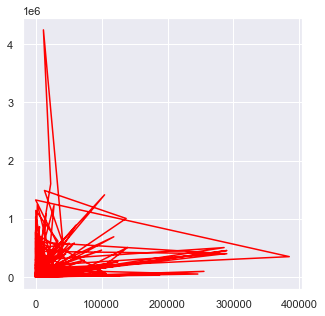

In [104]:
plt.plot(favourites_count, friends_count, color='red')

In [105]:
followers=result["followers_count"]

In [106]:
followers[0]

3

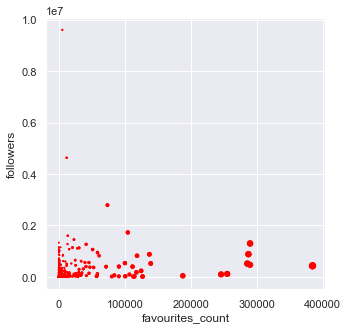

In [107]:
plt.ylabel("followers")
plt.xlabel("favourites_count")
plt.scatter(result["favourites_count"], result["followers_count"], s=1+favourites_count//10000, color='red')
# x_1=np.array(np.arange(0, max(favourites_count)))
# y_1=(x_1)
# plt.scatter(x_1,y_1, color='blue', s=0.01)
#scatter plot:


In [108]:
# using r squared for correaltion
# https://www.kite.com/python/answers/how-to-calculate-r-squared-with-numpy-in-python
x_values, y_values  = result["favourites_count"], result["followers_count"]

correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.034156280710793525


(0.0, 200000.0)

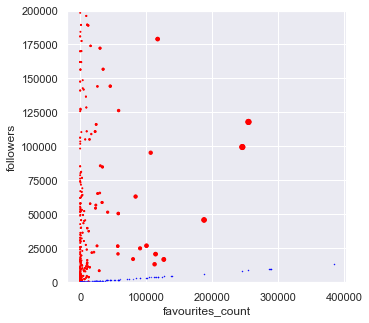

In [109]:
plt.ylabel("followers")
plt.xlabel("favourites_count")
plt.scatter(result["favourites_count"], result["followers_count"], s=1+favourites_count//10000, color='red')
# r squared
plt.scatter(result["favourites_count"], result["favourites_count"]*r_squared, s=0.1, color='blue')
plt.ylim([0, 200000])

(0.0, 20.0)

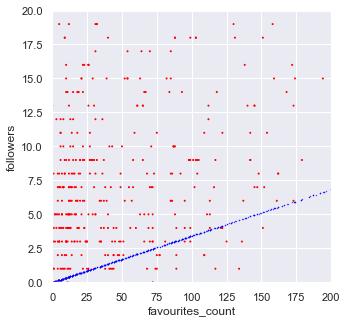

In [110]:
# view the graph at [0,200], [0, 20] with blue r squared. line
plt.ylabel("followers")
plt.xlabel("favourites_count")
plt.scatter(result["favourites_count"], result["followers_count"], s=1+favourites_count//10000, color='red')
# r squared
plt.scatter(result["favourites_count"], result["favourites_count"]*r_squared, s=0.1, color='blue')
plt.xlim([0, 200])
plt.ylim([0, 20])

(0.0, 3.4156280710793525)

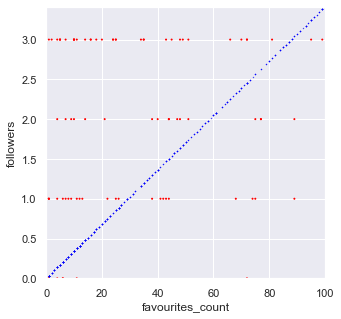

In [111]:
# view the graph at [0,100], [0, 100*r_squared] with blue r squared line
plt.ylabel("followers")
plt.xlabel("favourites_count")
plt.scatter(result["favourites_count"], result["followers_count"], s=1+favourites_count//10000, color='red')
# r squared
plt.scatter(result["favourites_count"], result["favourites_count"]*r_squared, s=0.1, color='blue')
plt.xlim([0, 100])
plt.ylim([0, 100*r_squared])

(0.0, 13.66251228431741)

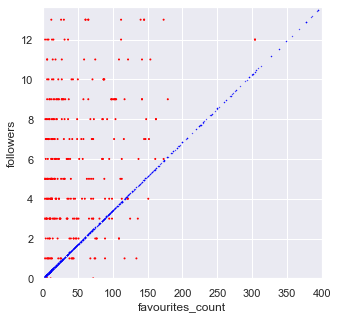

In [112]:
# view the graph at [0,400], [0, 400*r_squared] with blue r squared line
# axes.set_ylim([ymin,ymax])
plt.ylabel("followers")
plt.xlabel("favourites_count")
plt.scatter(result["favourites_count"], result["followers_count"], s=1+favourites_count//10000, color='red')
plt.scatter(result["favourites_count"], result["favourites_count"]*r_squared, s=0.1, color='blue')
plt.xlim([0, 400])
plt.ylim([0, 400*r_squared])

In [113]:
# Benford's law:

In [114]:
result=result["followers_count"]
result=result.astype(str).str[0]

In [115]:
result=result.astype(str).str[0]
x = np.array(np.arange(1, 10))
y=np.log10(1 + 1/x)

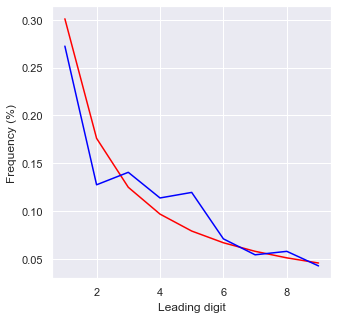

In [116]:
leading_digits = result.where( result != "0").dropna()
digit_counts = leading_digits.value_counts(normalize=True)
digit_counts.index=[int(z) for z in digit_counts.index ]
digit_counts= digit_counts.sort_index()
plt.ylabel('Frequency (%)')
plt.xlabel('Leading digit')

plt.plot(x, y , color='red')

plt.plot(digit_counts.index, digit_counts.values, color='blue')

plt.show()

In [117]:
digit_counts.index, digit_counts.values

(Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64'),
 array([0.27246377, 0.12753623, 0.14057971, 0.11376812, 0.11956522,
        0.07101449, 0.05434783, 0.05797101, 0.04275362]))

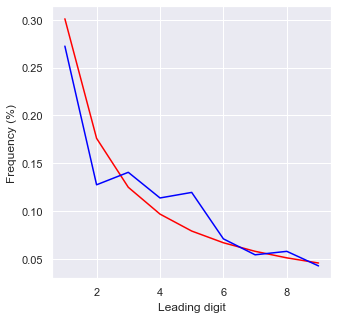

In [118]:
x = np.array(np.arange(1, 10))
y=np.log10(1 + 1/x)
leading_digits = result.where( result != "0").dropna()
digit_counts = leading_digits.value_counts(normalize=True)
digit_counts.index=[int(z) for z in digit_counts.index ]
digit_counts= digit_counts.sort_index()
plt.ylabel('Frequency (%)')
plt.xlabel('Leading digit')
plt.plot(x, y , color='red')

plt.plot(digit_counts.index, digit_counts.values, color='blue')

plt.show()

Resources:
-  https://www.econstor.eu/bitstream/10419/88418/1/773918388.pdf
- https://www.r-bloggers.com/2020/08/benfords-law-applying-to-existing-data/
- https://contaratoandressa.medium.com/benford-law-and-fraud-analysis-118935794cca
- http://www.carole.bernard.free.fr/slides/slides_%20Madoff%20_%20BernardBoyleJOD.pdf
- https://www.ou.edu/dam/price/Finance/Oklahoma_conference/2011/William%20Gerken%20-%20Finding%20Bernie%20Madoff%20Detecting%20Fraud%20by%20Investment%20Managers.pdf
- https://towardsdatascience.com/frawd-detection-using-benfords-law-python-code-9db8db474cf8

python code:
- https://github.com/milcent/benford_py/tree/master/benford
- https://github.com/czengnn/Benfords-Law-Twitter-Users/blob/main/tweepy_to_user_object_df.ipynb
